In [1]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

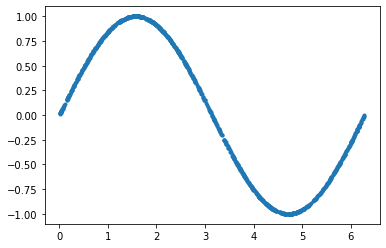

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(2, 256),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(64, 1),
                nn.Sigmoid(),
        )
    
    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(2, 16),
                nn.ReLU(),
                nn.Linear(16, 32),
                nn.ReLU(),
                nn.Linear(32, 2),
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
generator = Generator()

In [10]:
lr = 0.001
num_epochs = 300
loss_func = nn.BCELoss()

In [11]:
discriminator_opti = torch.optim.Adam(discriminator.parameters(), lr=lr)
generator_opti = torch.optim.Adam(generator.parameters(), lr=lr)

In [14]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        
        # training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_func(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        discriminator_opti.step()
        
        # data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))
        
        # training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_func(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        generator_opti.step()
        
        # show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G: {loss_generator}")

Epoch: 0 Loss D: 0.1522696167230606
Epoch: 0 Loss G: 2.9151010513305664
Epoch: 10 Loss D: 0.5170544981956482
Epoch: 10 Loss G: 1.1910916566848755
Epoch: 20 Loss D: 0.6534489989280701
Epoch: 20 Loss G: 0.9805965423583984
Epoch: 30 Loss D: 0.545508623123169
Epoch: 30 Loss G: 0.9023230075836182
Epoch: 40 Loss D: 0.588913083076477
Epoch: 40 Loss G: 0.7441899180412292
Epoch: 50 Loss D: 0.6245182752609253
Epoch: 50 Loss G: 0.9112446308135986
Epoch: 60 Loss D: 0.6379849314689636
Epoch: 60 Loss G: 0.7382182478904724
Epoch: 70 Loss D: 0.6472092866897583
Epoch: 70 Loss G: 0.7827926278114319
Epoch: 80 Loss D: 0.7046142816543579
Epoch: 80 Loss G: 0.8289894461631775
Epoch: 90 Loss D: 0.6193328499794006
Epoch: 90 Loss G: 0.9578771591186523
Epoch: 100 Loss D: 0.6373370885848999
Epoch: 100 Loss G: 0.811092734336853
Epoch: 110 Loss D: 0.672482430934906
Epoch: 110 Loss G: 0.7975646257400513
Epoch: 120 Loss D: 0.5628734230995178
Epoch: 120 Loss G: 0.8202075958251953
Epoch: 130 Loss D: 0.6367555260658264


In [15]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

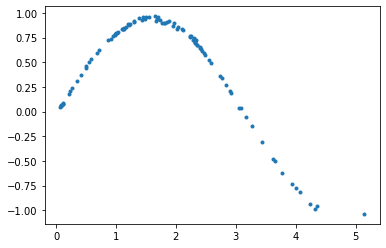

In [16]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [17]:
import torchvision
import torchvision.transforms as transforms

In [18]:
torch.manual_seed(100)

In [20]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [21]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [23]:
train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [24]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

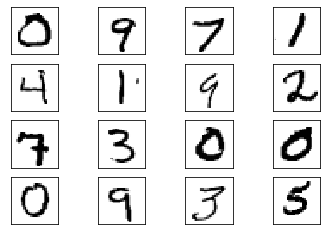

In [25]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [26]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(784, 1024),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(256, 1),
                nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [27]:
discriminator = Discriminator().to(device=device)

In [30]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(100, 256),
                nn.ReLU(),
                nn.Linear(256, 512),
                nn.ReLU(),
                nn.Linear(512, 1024),
                nn.ReLU(),
                nn.Linear(1024, 784),
                nn.Tanh(),
        )
        
    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [31]:
generator = Generator().to(device=device)

In [32]:
lr = 0.0001
num_epochs = 50
loss_func = nn.BCELoss()

disc_opti = torch.optim.Adam(discriminator.parameters(), lr=lr)
gene_opti = torch.optim.Adam(generator.parameters(), lr=lr)

In [33]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # data for discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        
        # training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_func(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        disc_opti.step()
        
        # data for generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
        
        # training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_func(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        gene_opti.step()
        
        # show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G: {loss_generator}")

Epoch: 0 Loss D: 0.5075950622558594
Epoch: 0 Loss G: 0.5759748816490173
Epoch: 1 Loss D: 0.05483996868133545
Epoch: 1 Loss G: 5.543529987335205
Epoch: 2 Loss D: 0.0108174504712224
Epoch: 2 Loss G: 5.759162425994873
Epoch: 3 Loss D: 0.004986046813428402
Epoch: 3 Loss G: 5.802756309509277
Epoch: 4 Loss D: 0.06239645928144455
Epoch: 4 Loss G: 5.307766914367676
Epoch: 5 Loss D: 0.18749374151229858
Epoch: 5 Loss G: 5.114771366119385
Epoch: 6 Loss D: 0.10823293030261993
Epoch: 6 Loss G: 3.6073355674743652
Epoch: 7 Loss D: 0.10139885544776917
Epoch: 7 Loss G: 4.083014488220215
Epoch: 8 Loss D: 0.13247010111808777
Epoch: 8 Loss G: 3.3567986488342285
Epoch: 9 Loss D: 0.27223560214042664
Epoch: 9 Loss G: 2.0825862884521484
Epoch: 10 Loss D: 0.3813592195510864
Epoch: 10 Loss G: 1.7906490564346313
Epoch: 11 Loss D: 0.2865586280822754
Epoch: 11 Loss G: 1.4934929609298706
Epoch: 12 Loss D: 0.3922411799430847
Epoch: 12 Loss G: 1.912843108177185
Epoch: 13 Loss D: 0.3221310079097748
Epoch: 13 Loss G: 1

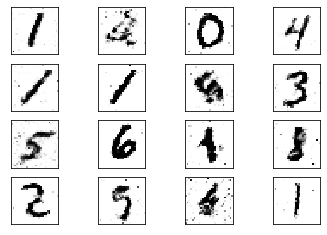

In [34]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])